<a href="https://colab.research.google.com/github/askmuhsin/ocr_data_management/blob/main/demo_of_ocr_and_jina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# ! rm -rf ./ocr_data_management

In [37]:
! git clone https://github.com/askmuhsin/ocr_data_management

Cloning into 'ocr_data_management'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 209 (delta 109), reused 174 (delta 78), pack-reused 0
Receiving objects: 100% (209/209), 8.37 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [1]:
! ls ocr_data_management/*

ocr_data_management/LICENSE  ocr_data_management/README.md

ocr_data_management/infra:
ocr-service-execute_lambda  text-index-execute_lambda

ocr_data_management/ocr_services:
app  Dockerfile  envs  requirements.txt  scripts  tests

ocr_data_management/search_service:
bert_uncased_flow.py  simple_search_flow.py


In [2]:
! cat ./ocr_data_management/ocr_services/requirements.txt

fastapi>=0.68.0,<0.69.0
pydantic>=1.8.0,<2.0.0
uvicorn>=0.15.0,<0.16.0
protobuf==3.20.0
paddlepaddle==2.3.0
paddleocr==2.5.0.3
boto3==1.24.2
jina


In [ ]:
! pip install paddlepaddle==2.3.0
! pip install paddleocr==2.5.0.3
! pip install jina

In [31]:
import warnings
import sys

warnings.filterwarnings("ignore")
sys.path.append('./ocr_data_management/ocr_services/app')
sys.path.append('./ocr_data_management/search_service')

## Paddle OCR to convert images to text

In [7]:
from models.paddle_ocr import PaddleOCRModel
import matplotlib.pyplot as plt
import cv2

In [8]:
ocr_model = PaddleOCRModel()
ocr_model.font_path = './ocr_data_management/ocr_services/app/models/fonts/simfang.ttf'

[2022/06/10 04:16:27] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [9]:
def read_image(image_path, debug=True):
  image_file_path = image_path
  img = cv2.imread(image_file_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  if debug:
    print(img.shape)
    plt.imshow(img)

  return img

In [13]:
! ls ./ocr_data_management/ocr_services/tests/*.png

./ocr_data_management/ocr_services/tests/test_1.png
./ocr_data_management/ocr_services/tests/test_2.png
./ocr_data_management/ocr_services/tests/test_3.png
./ocr_data_management/ocr_services/tests/test_4.png
./ocr_data_management/ocr_services/tests/text_1.png


(506, 864, 3)


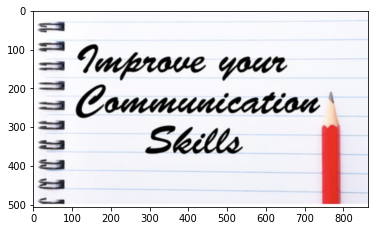

In [23]:
image_file_path = './ocr_data_management/ocr_services/tests/test_1.png'
img = read_image(image_file_path)

[2022/06/10 04:18:34] ppocr DEBUG: dt_boxes num : 6, elapse : 0.5271422863006592
[2022/06/10 04:18:34] ppocr DEBUG: cls num  : 6, elapse : 0.11103415489196777
[2022/06/10 04:18:36] ppocr DEBUG: rec_res num  : 6, elapse : 1.329615831375122
[[[[117.0, 86.0], [457.0, 109.0], [451.0, 193.0], [111.0, 170.0]], ('Improve', 0.9333591461181641)], [[[476.0, 119.0], [654.0, 113.0], [656.0, 170.0], [478.0, 176.0]], ('2mon', 0.6741129159927368)], [[[118.0, 195.0], [184.0, 195.0], [184.0, 267.0], [118.0, 267.0]], ('c', 0.5049368143081665)], [[[187.0, 218.0], [736.0, 218.0], [736.0, 266.0], [187.0, 266.0]], ('ommunication', 0.9645776152610779)], [[[296.0, 296.0], [539.0, 299.0], [538.0, 373.0], [295.0, 370.0]], ('Skills', 0.9676530957221985)]]

Improve 2mon c ommunication Skills 


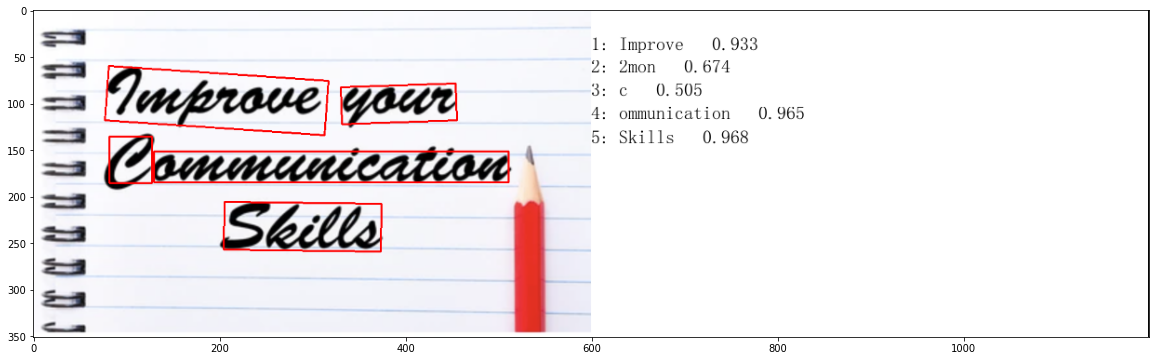

In [24]:
ocr_model.predict(img)

In [29]:
ocr_model.processed_output['stitched_text']

'Improve 2mon c ommunication Skills '

In [30]:
ocr_model.result

[[[[117.0, 86.0], [457.0, 109.0], [451.0, 193.0], [111.0, 170.0]],
  ('Improve', 0.9333591461181641)],
 [[[476.0, 119.0], [654.0, 113.0], [656.0, 170.0], [478.0, 176.0]],
  ('2mon', 0.6741129159927368)],
 [[[118.0, 195.0], [184.0, 195.0], [184.0, 267.0], [118.0, 267.0]],
  ('c', 0.5049368143081665)],
 [[[187.0, 218.0], [736.0, 218.0], [736.0, 266.0], [187.0, 266.0]],
  ('ommunication', 0.9645776152610779)],
 [[[296.0, 296.0], [539.0, 299.0], [538.0, 373.0], [295.0, 370.0]],
  ('Skills', 0.9676530957221985)]]

## JINA to index, and search

In [36]:
from bert_uncased_flow import define_flow as get_bert_uncased_flow
from simple_search_flow import define_flow as get_simple_search_flow
from simple_search_flow import print_matches

from docarray import Document, DocumentArray

In [33]:
flow = get_simple_search_flow()
flow.plot('flow.svg')


In [52]:
sample_text = [
    "sample text 1",
    "text about airlines",
    "something else about mac",
    "Sri Lanka amends electricity law",
    "National Transplant Resource Centre: Almost all organ donation pledgers do not honour promise",
    "In sports celebrating my win at the Memorial Tournament presented by Workday",
]

da = DocumentArray(
    [
        Document(text=x) 
        for x in sample_text
    ]
)

search_test_1 = 'organ donor'
search_test_2 = 'apple mac'
search_test_3 = 'airlines industry'

TEXT_TO_SEARCH = search_test_1 ## change search text here

with flow:
  print(f'Search Text : {TEXT_TO_SEARCH}')
  flow.index(da)
  flow.search(Document(text=TEXT_TO_SEARCH), on_done=print_matches)

Output()

╭──── 🎉 Flow is ready to serve! ─────╮
│  🔗  Protocol               GRPC    │
│  🏠     Local      ]8;id=167464;grpc://0.0.0.0:65142\0.0.0.0]8;;\]8;id=167464;grpc://0.0.0.0:65142\:]8;;\]8;id=167464;grpc://0.0.0.0:65142\65142]8;;\    │
│  🔒   Private   ]8;id=85460;grpc://172.28.0.2:65142\172.28.0.2]8;;\]8;id=85460;grpc://172.28.0.2:65142\:]8;;\]8;id=85460;grpc://172.28.0.2:65142\65142]8;;\    │
│  🌍    Public  ]8;id=36718;grpc://34.73.64.51:65142\34.73.64.51]8;;\]8;id=36718;grpc://34.73.64.51:65142\:]8;;\]8;id=36718;grpc://34.73.64.51:65142\65142]8;;\    │
╰─────────────────────────────────────╯

Search Text : organ donor


[0]0.000000: "National Transplant Resource Centre: Almost all organ donation pledgers do not honour promise"
[1]0.000000: "In sports celebrating my win at the Memorial Tournament presented by Workday"
[2]0.000000: "something else about mac"
